<a href="https://colab.research.google.com/github/deviayu05/Sentimen_Analisis_Penanganan_Sampah/blob/main/Sentimen_Analisis_Penanganan_Sampah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library & Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
warnings.filterwarnings("ignore")
import pickle

In [ ]:
data_path = '/content/drive/MyDrive/dataClean.xlsx'

In [ ]:
# Mengimport dataset

data = pd.read_excel(data_path)

In [ ]:
data.head()

,Text,Label
0,objektif utama mengasingkan sampah kepada sisa...,positif
1,malas asing sampah banyak tanah dijadikan tap...,negatif
2,beda negara beda permasalahan dlm kebijakan da...,negatif
3,minim pendidikan bandung buang sampah aja num...,negatif
4,reduce reuse recycle merupakan maksud penangan...,positif


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    149 non-null    object
 1   Label   149 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [ ]:
data_review = data[['Text']]
data_review.head()

,Text
0,objektif utama mengasingkan sampah kepada sisa...
1,malas asing sampah banyak tanah dijadikan tap...
2,beda negara beda permasalahan dlm kebijakan da...
3,minim pendidikan bandung buang sampah aja num...
4,reduce reuse recycle merupakan maksud penangan...


In [ ]:
data["Label"].value_counts()

negatif    79
positif    70
Name: Label, dtype: int64

In [ ]:
print('Total Jumlah Data:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] negatif\t:', data[data.Label == 'negatif'].shape[0], 'data')
print('-- [2] positif\t:', data[data.Label == 'positif'].shape[0], 'data')

Total Jumlah Data: 149 data

terdiri dari (label):
-- [1] negatif	: 79 data
-- [2] positif	: 70 data


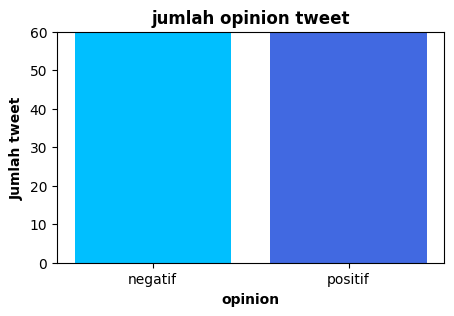

In [ ]:
height = data['Label'].value_counts()
labels = ['negatif', 'positif']
y_pos = np.arange(len(labels))

plt.figure(figsize=(5,3), dpi=100)
plt.ylim(0,60)
plt.title('jumlah opinion tweet', fontweight='bold')
plt.xlabel('opinion', fontweight='bold')
plt.ylabel('Jumlah tweet', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

# **Feature Engineering**

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

# Convert feature 'Label'
data['Label'] = LE.fit_transform(data['Label'])
print(LE.classes_)
print(np.sort(data['Label'].unique()))
print('')

['negatif' 'positif']
[0 1]



In [ ]:
# Pisahkan kolom feature dan target
X = data['Text']
y = data['Label']

In [ ]:
X

0      objektif utama mengasingkan sampah kepada sisa...
1      malas asing sampah  banyak tanah dijadikan tap...
2      beda negara beda permasalahan dlm kebijakan da...
3      minim pendidikan  bandung buang sampah aja num...
4      reduce reuse recycle merupakan maksud penangan...
                             ...                        
144    pembangunan incinerator untuk optimalkan penan...
145    masa pegawai perusahaan besar gak paham alur p...
146    udah sering bikin macet jalur puncak ditambah ...
147    prediksi kami tpa sarimukti sudah overload pen...
148    memprihatinkan mau isinya rumput atau apa tete...
Name: Text, Length: 149, dtype: object

In [ ]:
y

0      1
1      0
2      0
3      0
4      1
      ..
144    1
145    0
146    0
147    0
148    0
Name: Label, Length: 149, dtype: int64

# **Feature Extraction (TF-IDF & N-Gram)**

In [ ]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)
x_tf_idf = tf_idf.transform(X)

In [ ]:
# Melihat Jumlah Fitur

print(len(tf_idf.get_feature_names_out()))

1043


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus

print(tf_idf.get_feature_names_out())

['10' '12' '2024' ... 'yayasan' 'yg' 'zero']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,10,12,2024,3r,70,abis,abong,acara,ada,adakah,...,wilayahnya,wisata,wkwk,wkwkw,ya,yakni,yang,yayasan,yg,zero
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.137879,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.287744,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.237044,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.105298,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
145,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
146,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
147,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

# **Feature Selection**

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur

X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=100)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 1043
Reduced feature number: 100


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya

data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.000776
1,0.200186
2,0.350845
3,0.700792
4,0.224162
...,...
1038,0.236828
1039,0.070686
1040,0.427991
1041,0.089851


In [ ]:
# Menampilkan fitur beserta nilainya

feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.000776,10
1,0.200186,12
2,0.350845,2024
3,0.700792,3r
4,0.224162,70
...,...,...
1038,0.236828,yakni
1039,0.070686,yang
1040,0.427991,yayasan
1041,0.089851,yg


In [ ]:
# Mengurutkan fitur terbaik

data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
992,3.077399,tpst
86,2.501218,bau
44,2.465307,aqua
556,1.978282,mengganggu
710,1.912666,pengelolaan
...,...,...
25,0.000124,aku
366,0.000075,juga
302,0.000065,harus
595,0.000044,minim


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih

mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square

new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['3r',
 'ada',
 'agar',
 'aja',
 'apa',
 'aqua',
 'baik',
 'bakti',
 'bangun',
 'bau',
 'baunya',
 'berastagi',
 'berhasil',
 'bersih',
 'bikin',
 'botol',
 'buang',
 'buanglah',
 'bukan',
 'cleo',
 'danone',
 'dengan',
 'denpasar',
 'depan',
 'dilakukan',
 'dinas',
 'diperlukan',
 'ditiru',
 'dprd',
 'gak',
 'galon',
 'gelas',
 'hari',
 'incinerator',
 'indonesia',
 'ingin',
 'itu',
 'jangan',
 'juara',
 'kali',
 'kan',
 'kemasan',
 'kepada',
 'kerja',
 'kertalangu',
 'kesiman',
 'kg',
 'kota',
 'lain',
 'lapangan',
 'liat',
 'mana',
 'masyarakat',
 'mau',
 'melalui',
 'menangani',
 'mengganggu',
 'mengurangi',
 'menjadi',
 'menyelamatkan',
 'mereka',
 'meresmikan',
 'merupakan',
 'negara',
 'negeri',
 'optimalkan',
 'pada',
 'pakai',
 'pembangunan',
 'pemerintah',
 'pemkab',
 'penanganan',
 'pengelolaan',
 'pengolahan',
 'polusi',
 'presiden',
 'resmikan',
 'ri',
 'saja',
 'sampai',
 'sangat',
 'sehingga',
 'sekali',
 'seluruh',
 'sembarangan',
 'serang',
 'sih',
 'soal',
 'sudah',
 

In [ ]:
tf_idf.vocabulary_

{'objektif': 642,
 'utama': 1020,
 'mengasingkan': 551,
 'sampah': 827,
 'kepada': 417,
 'sisa': 894,
 'baki': 69,
 'dengan': 191,
 'kitar': 433,
 'semula': 871,
 'adalah': 10,
 'untuk': 1014,
 'mengurangkan': 568,
 'kebergantungan': 396,
 'kita': 432,
 'tapak': 929,
 'pelupusan': 690,
 'semakin': 863,
 'banyak': 80,
 'dibuka': 201,
 'buruk': 153,
 'natijahnya': 611,
 'malas': 500,
 'asing': 48,
 'tanah': 924,
 'dijadikan': 210,
 'asingkanlah': 49,
 'anda': 36,
 'boleh': 136,
 'dikitar': 212,
 'dan': 178,
 'beda': 92,
 'negara': 614,
 'permasalahan': 733,
 'dlm': 239,
 'kebijakan': 398,
 'tata': 932,
 'kotanya': 450,
 'tetanggaku': 971,
 'misalnya': 598,
 'hampir': 298,
 'gak': 271,
 'ada': 8,
 'pun': 777,
 'di': 196,
 'area': 45,
 'umumpdhl': 1012,
 'cuma': 171,
 'selisih': 860,
 'jam': 351,
 'lebih': 477,
 'perjalanan': 730,
 'minim': 595,
 'pendidikan': 706,
 'bandung': 73,
 'buang': 142,
 'aja': 16,
 'numpuk': 634,
 'pinggir': 745,
 'jalan': 348,
 'wkwkw': 1036,
 'kolam': 440,
 'ma

In [ ]:
# Lihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [ ]:
kbest_feature

{'utama': 1020,
 'kepada': 417,
 'dengan': 191,
 'untuk': 1014,
 'negara': 614,
 'gak': 271,
 'ada': 8,
 'buang': 142,
 'aja': 16,
 'merupakan': 586,
 'penanganan': 703,
 'mengurangi': 567,
 '3r': 3,
 'terpadu': 961,
 'menjadi': 575,
 'pengelolaan': 710,
 'seluruh': 862,
 'masyarakat': 515,
 'diperlukan': 223,
 'indonesia': 333,
 'sangat': 832,
 'mereka': 583,
 'tuh': 997,
 'botol': 137,
 'gelas': 279,
 'aqua': 44,
 'mau': 519,
 'kan': 383,
 'bikin': 128,
 'kemasan': 412,
 'jangan': 352,
 'kerja': 418,
 'bakti': 70,
 'dilakukan': 215,
 'melalui': 523,
 'hari': 300,
 'buanglah': 143,
 'pada': 660,
 'tempatnya': 943,
 'itu': 344,
 'cleo': 165,
 'upaya': 1016,
 'pemerintah': 696,
 'baik': 65,
 'soal': 898,
 'danone': 180,
 'berastagi': 104,
 'kota': 449,
 'pemkab': 697,
 'serang': 879,
 'bangun': 76,
 'pembangunan': 692,
 'incinerator': 330,
 'optimalkan': 651,
 'berhasil': 109,
 'menangani': 537,
 'lain': 463,
 'mana': 506,
 'kali': 376,
 'mengganggu': 556,
 'bau': 86,
 'sekali': 854,
 '

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,3r,ada,agar,aja,apa,aqua,baik,bakti,bangun,bau,...,tapi,teman,tempatnya,terpadu,thrift,tpst,tuh,untuk,upaya,utama
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112096,0.0,0.155269
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.000000,0.137879,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,0.190787,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.237044,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256733,0.0,0.000000
145,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
146,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
147,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# **Split Data & Data Normalization**

In [ ]:
#membagi data treining dan data testing
#membagi untuk testing 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size = 0.2, random_state = 42)
negatif_test = (y_test == 0).sum()
positif_test = (y_test == 1).sum()

negatif_train = (y_train == 0).sum()
positif_train = (y_train == 1).sum()

print('Jumlah data uji opini negatif:', negatif_test)
print('Jumlah data uji opini positif:', positif_test)

print('Jumlah data latih opini negatif:', negatif_train)
print('Jumlah data latih opini positif:', positif_train)

Jumlah data uji opini negatif: 12
Jumlah data uji opini positif: 18
Jumlah data latih opini negatif: 67
Jumlah data latih opini positif: 52


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train, y_train = sm.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

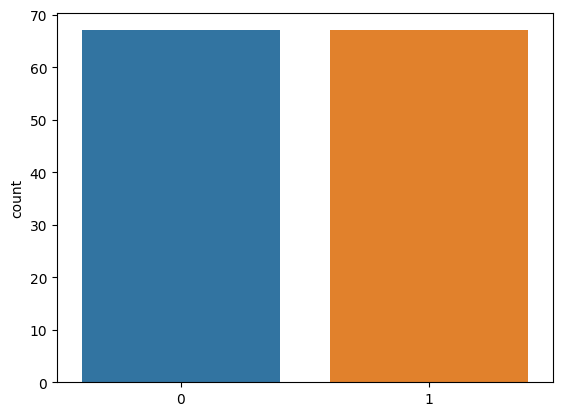

In [ ]:
sns.countplot(x = y_train)

#**Modelling**

##**K-NN**

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

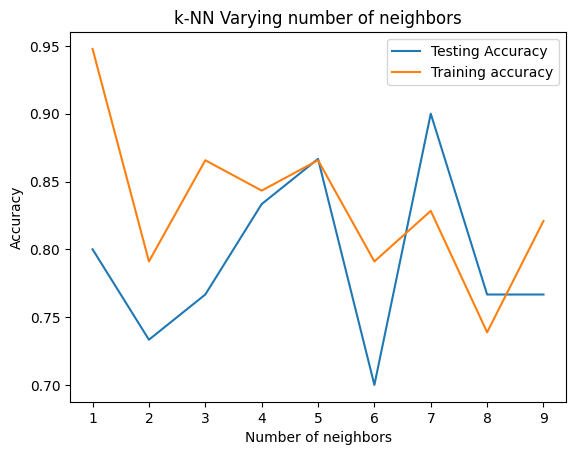

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [ ]:
#let us get the predictions using the knn classifier we had fit above

y_pred_knn = knn.predict(X_test)

In [ ]:
# Simpan model knn hasil traning

from joblib import dump
dump(knn, filename='model_knn.joblib')

['model_knn.joblib']

##**Naive Bayes**

In [ ]:
#import NaiveBayesClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Setup naive bayes classifier
NaiveBayes = GaussianNB()

In [ ]:
#Fit the model
NaiveBayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
#let us get the predictions using the naive bayes classifier we had fit above

y_pred_nb = NaiveBayes.predict(X_test)

In [ ]:
# Simpan model naive bayes hasil traning

from joblib import dump
dump(NaiveBayes, filename='model_nb.joblib')

['model_nb.joblib']

#**Evaluation**

##**K-NN**

Text(0.5, 23.52222222222222, 'Predicted label')

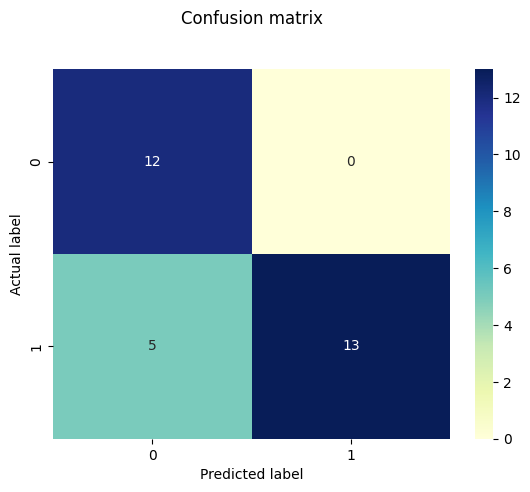

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_knn = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report

akurasi = classification_report(y_test, y_pred_knn)
print(akurasi)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.72      0.84        18

    accuracy                           0.83        30
   macro avg       0.85      0.86      0.83        30
weighted avg       0.88      0.83      0.83        30



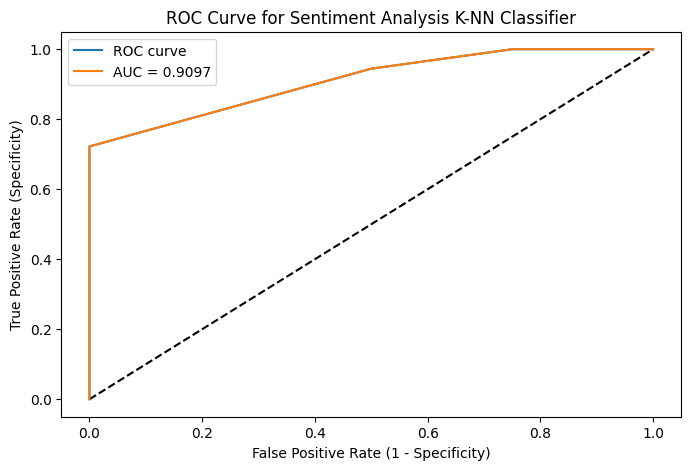

In [ ]:
# Drawing the ROC Curve

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label="ROC curve")
plt.plot([0,1], [0,1], 'k--' )
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.title('ROC Curve for Sentiment Analysis K-NN Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.legend()
plt.gcf().set_size_inches(8,5)
plt.show()

##**Naive Bayes**

Text(0.5, 23.52222222222222, 'Predicted label')

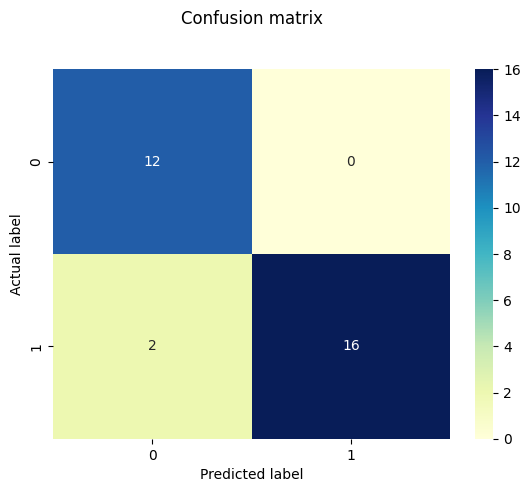

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_nb = NaiveBayes.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_nb)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report

akurasi = classification_report(y_test, y_pred_nb)
print(akurasi)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.89      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



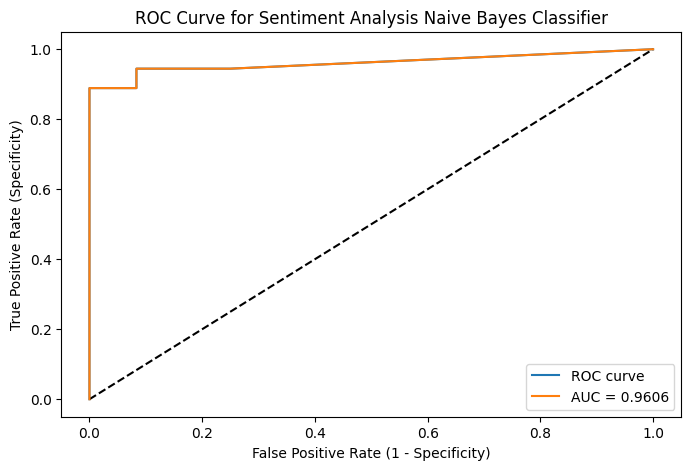

In [ ]:
# Drawing the ROC Curve

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(y_test,NaiveBayes.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0,1], [0,1], 'k--' )
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.title('ROC Curve for Sentiment Analysis Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.legend()
plt.gcf().set_size_inches(8,5)
plt.show()